In [1]:
from dataloader import get_dataloaders
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [6]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [3]:
train_dataloader, test_dataloader = get_dataloaders(split_ratio=0.85)

Creating dataset using all available samples.
Creating positive examples.


  0%|          | 0/649 [00:00<?, ?it/s]

Creating negative examples.


  0%|          | 0/7326 [00:00<?, ?it/s]

Dataset created : 14652 examples (7326 positive examples, 7326 nagative examples)
Spliting dataset. Ratio : 0.85.
Training dataset size : 12454. Testing dataset size : 2198.


In [7]:
n_hidden = 35
model = nn.Sequential(
    nn.Linear(70, n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, 1),
    nn.Sigmoid()
)

model.to(device)

print(model)
print(f'Model on device : {next(model.parameters()).device}.')

criterion = nn.MSELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Sequential(
  (0): Linear(in_features=70, out_features=35, bias=True)
  (1): ReLU()
  (2): Linear(in_features=35, out_features=1, bias=True)
  (3): Sigmoid()
)
Model on device : cpu.


In [8]:
mean_loss = []
nb_examples = len(train_dataloader.dataset)

n_epoch = 100
model.train(True)
for epoch in tqdm(range(n_epoch)):  # loop over the dataset multiple times
    loss_sum = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)[:,0]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()
    mean_loss.append(loss_sum / nb_examples)

print('Finished Training')

  0%|          | 0/100 [00:00<?, ?it/s]

Finished Training


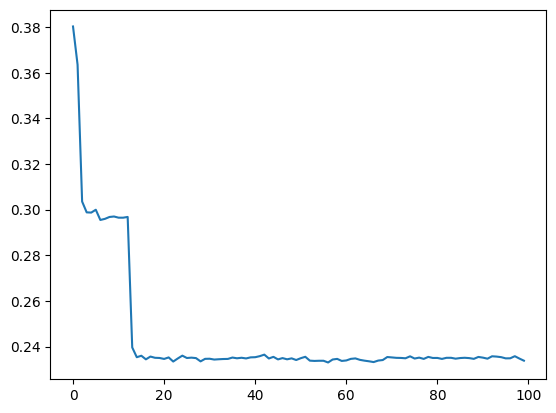

In [9]:
plt.plot(mean_loss)